# Explore dataset directory

Stefan/Yuzhao Heng

Since Fri. Sep. 10th, 2021

Explore the PVC dataset, understand what's contained in the files.

## Setup


In [1]:
# import numpy as np
import pandas as pd
from scipy.io import loadmat

import re
import os
import glob
from sys import getsizeof

from icecream import ic

# import matplotlib.pyplot as plt

from util import *
from ecg_data import DataGetter

os.chdir('../../PVC_DATA')


## Check spreadsheets content

### `Data for Dae and Weiqing_myver`



In [2]:
fnm = 'Data for Dae and Weiqing_myver'
sheet_csv = pd.read_csv(f'{fnm}.csv')
sheet_exe = pd.read_excel(f'{fnm}.xls')

try:
    # ic(sheet_csv, sheet_exe)
    pd.testing.assert_frame_equal(sheet_csv, sheet_exe)  # Not equal
except:
    ...


### Convert an XLS to CSV


In [3]:
try:
    fnm = 'Data sum'
    sheet = pd.read_excel(f'{fnm}.xls')
    sheet.to_csv()
except:
    ...

`MM_classifier/inf`


In [4]:
df = pd.read_csv('MM_classifier/inf.csv')
ic(df.iloc[0])


ic| df.iloc[0]: Unnamed: 0                  1
                infna           46_144 LV.mat
                Unnamed: 2          63.136364
                Unnamed: 3         -30.681818
                Unnamed: 4        -313.886364
                                    ...      
                Unnamed: 105        62.704545
                Unnamed: 106         5.090909
                Unnamed: 107        27.431818
                Unnamed: 108        17.795455
                Unnamed: 109         19.97619
                Name: 0, Length: 110, dtype: object


Unnamed: 0                  1
infna           46_144 LV.mat
Unnamed: 2          63.136364
Unnamed: 3         -30.681818
Unnamed: 4        -313.886364
                    ...      
Unnamed: 105        62.704545
Unnamed: 106         5.090909
Unnamed: 107        27.431818
Unnamed: 108        17.795455
Unnamed: 109         19.97619
Name: 0, Length: 110, dtype: object

## Explore .MAT files

### Find all .MAT files


In [5]:
def sz(x):
    return sizeof_fmt(os.path.getsize(x))

mats = glob.glob('**/*.mat', recursive=True)
mats.sort(key=os.path.getsize, reverse=True)

ic(len(mats))

for nm in mats:
    ic(nm, sz(nm))
# for fnm in
#     ic(fnm, sz(fnm))


ic| len(mats): 17
ic| nm: 'MM_classifier/alldata.mat', sz(nm): '47.4MiB'
ic| nm: 'MM_classifier/ecg_nonnorm.mat', sz(nm): '9.5MiB'
ic| nm: 'MM_classifier/vtdata.mat', sz(nm): '4.3MiB'
ic| nm: 'MM_classifier/allcontrol.mat', sz(nm): '2.0MiB'
ic| nm: 'MM_classifier/simul_123456789.mat', sz(nm): '1.3MiB'
ic| nm: 'MM_classifier/pm_slopes.mat', sz(nm): '874.7KiB'
ic| nm: 'MM_classifier/vtslope.mat', sz(nm): '87.8KiB'
ic| nm: 'MM_classifier/Superior.mat', sz(nm): '78.7KiB'
ic| nm: 'MM_classifier/pacemaplist_matlab_dyj.mat', sz(nm): '32.8KiB'
ic| nm: 'MM_classifier/inferior.mat', sz(nm): '30.8KiB'
ic| nm: 'MM_classifier/lvsam.mat', sz(nm): '13.4KiB'
ic| nm: 'MM_classifier/rvsam.mat', sz(nm): '13.2KiB'
ic| nm: 'MM_classifier/vt_slopefea32_1234.mat', sz(nm): '9.6KiB'
ic| nm: 'MM_classifier/allname.mat', sz(nm): '7.4KiB'
ic| nm: 'MM_classifier/freewall.mat', sz(nm): '4.7KiB'
ic| nm: 'MM_classifier/filename.mat', sz(nm): '2.9KiB'
ic| nm: 'MM_classifier/vtlist_matlab_dyj.mat', sz(nm): '1.1KiB'


### Which ones contain the actual annotated signals?


In [6]:
def sz(x):
    return sizeof_fmt(getsizeof(x))

candidates = mats[:4]
ic(candidates)

for f in candidates:
    ic(f)
    mat = loadmat(f)

    for key in mat.keys():
        i = mat[key]
        if type(i) is np.ndarray:
            s = sizeof_fmt(i.nbytes)
            ic(key, i.shape, s)

    ic('\n')


ic| candidates: ['MM_classifier/alldata.mat',
                 'MM_classifier/ecg_nonnorm.mat',
                 'MM_classifier/vtdata.mat',
                 'MM_classifier/allcontrol.mat']
ic| f: 'MM_classifier/alldata.mat'
ic| key: 'pm_ecg', i.shape: (1589, 4200), s: '50.9MiB'
ic| key: 'pm_epiendo', i.shape: (1589, 1), s: '1.6KiB'
ic| key: 'pm_qrswidth', i.shape: (1589, 1), s: '3.1KiB'
ic| key: 'vt_ecg', i.shape: (156, 4200), s: '5.0MiB'
ic| key: 'vt_qrswidth', i.shape: (1, 156), s: '312.0B'
ic| key: 'vtname', i.shape: (156, 1), s: '1.2KiB'
ic| key: 'pmname', i.shape: (1589, 1), s: '12.4KiB'
ic| key: 'vtcasename', i.shape: (156, 1), s: '1.2KiB'
ic| key: 'pmcasename', i.shape: (1589, 1), s: '12.4KiB'
ic| '\n': '
           '
ic| f: 'MM_classifier/ecg_nonnorm.mat'
ic| key: 'pm_ecg', i.shape: (503, 7644), s: '29.3MiB'
ic| key: 'vt_ecg', i.shape: (55, 6336), s: '2.7MiB'
ic| key: 'pvc_ecg', i.shape: (12, 5784), s: '542.2KiB'
ic| '\n': '
           '
ic| f: 'MM_classifier/vtdata.mat'
ic| k

#### alldata.mat


In [7]:
mat = loadmat(mats[0])
data = mat['pm_ecg']
ic(data, data.shape, data.dtype)


ic| data: array([[ -735.65      ,  -814.55544413,  -910.01103152, ...,
                   4219.90888252,  4253.87449857,  4319.8       ],
                 [-1337.65      , -1383.31475645, -1408.22020057, ...,
                    438.51633238,   448.49054441,   441.8       ],
                 [-1599.65      , -1722.48954155, -1929.64426934, ...,
                  -2644.32320917, -2664.04240688, -2682.2       ],
                 ...,
                 [  120.35      ,   224.53051576,   254.91160458, ...,
                  -5213.04813754, -5127.6469914 , -5078.2       ],
                 [ -912.65      ,  -691.5525788 ,  -465.76747851, ...,
                  -6867.15415473, -6774.15988539, -6719.2       ],
                 [  820.35      ,   939.84283668,  1141.39584527, ...,
                  -3438.93925501, -3431.62120344, -3443.2       ]])
    data.shape: (1589, 4200)
    data.dtype: dtype('<f8')


(array([[ -735.65      ,  -814.55544413,  -910.01103152, ...,
          4219.90888252,  4253.87449857,  4319.8       ],
        [-1337.65      , -1383.31475645, -1408.22020057, ...,
           438.51633238,   448.49054441,   441.8       ],
        [-1599.65      , -1722.48954155, -1929.64426934, ...,
         -2644.32320917, -2664.04240688, -2682.2       ],
        ...,
        [  120.35      ,   224.53051576,   254.91160458, ...,
         -5213.04813754, -5127.6469914 , -5078.2       ],
        [ -912.65      ,  -691.5525788 ,  -465.76747851, ...,
         -6867.15415473, -6774.15988539, -6719.2       ],
        [  820.35      ,   939.84283668,  1141.39584527, ...,
         -3438.93925501, -3431.62120344, -3443.2       ]]),
 (1589, 4200),
 dtype('<f8'))

#### vtdata.mat




mat = loadmat(mats[2])

for key in mat.keys():
    i = mat[key]
    if type(i) is np.ndarray:
        ic(key, i.shape, i[:10])


##### Plot a VT signal


ic| data: array([[  -253.65      ,   -306.77893983,   -310.32621777, ...,
                   -8864.51805158,  -8825.59541547,  -8811.2       ],
                 [  -869.65      ,   -919.57550143,   -967.65573066, ...,
                  -12170.28022923, -12170.2       , -12183.2       ],
                 [   119.35      ,    -43.12851003,   -216.31475645, ...,
                   -7121.0252149 ,  -7082.52664756,  -7055.2       ],
                 ...,
                 [  1667.35      ,   1611.06919771,   1499.40157593, ...,
                   -8046.44641834,  -8019.10544413,  -7996.2       ],
                 [   880.35      ,    911.47320917,   1058.7769341 , ...,
                   -9649.53810888,  -9642.68424069,  -9593.2       ],
                 [   900.35      ,    970.7969914 ,   1079.41876791, ...,
                   -8490.26017192,  -8502.33753582,  -8489.2       ]])
    data.shape: (156, 4200)
    data.dtype: dtype('<f8')


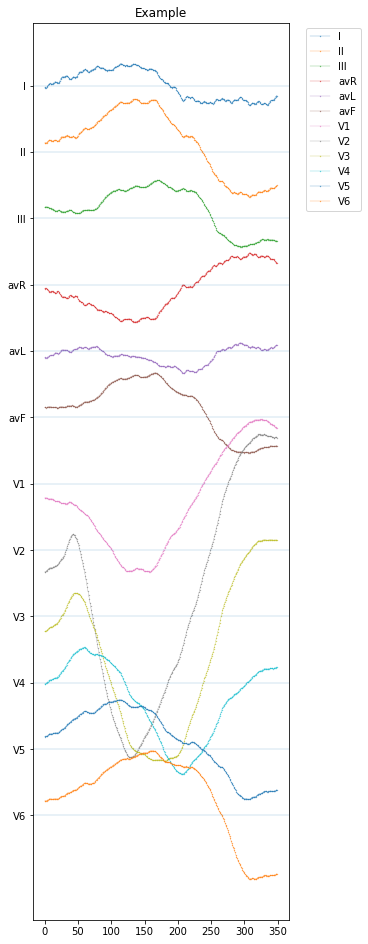

In [8]:
data = mat['vt_ecg']
ic(data, data.shape, data.dtype)

eg = data[0]
# plt.plot(np.arange(eg.size), eg)
plot_ecg(eg, 'Example')


## Match the .MAT files data with studies

### An overview of contents in each file & some extracted meta-attributes


In [9]:
dg = DataGetter()


# ic(get_num_patient('daeVt'))
# ic(get_num_patient('daePm'))
#
# daeRaw = dg('daeRaw')
#
#
# for key in ['vt_case_name', 'pvc_case_name', 'pm_case_name']:
#     nms = get_patient_names(daeRaw[key])
#     ic(key, np.unique(nms).size)
#
# ic(get_num_patient('daePmCtrl'))
# ic(get_num_patient('daePvcCtrl'))
# ic(get_num_patient('daePmSlope'))
# ic(get_num_patient('daeVtSlope'))
# ic(get_num_patient('daeVtSlope32', k='pat_num'))
#
# for key in ['daeSup.case_name', 'daeInf.case_name']:
#     ic(np.unique(get_patient_names(dg(key))).size)
#
# ic(get_num_patient('daeSimul', k='pat_num'))
# ic(get_num_patient('daePmLst', k='pat_num'))
# ic(get_num_patient('daeVtLst', k='pat_num'))
#
# ic(get_num_patient('daeLv'))
# ic(get_num_patient('daeRv'))
#
# for key in ['daePmName.case_name', 'daePmFw.case_name']:
#     ic(np.unique(get_patient_names(dg(key))).size)

D = dg.DSETS
for dnm in D:
    dg(dnm).overview()
for dnm in D:
    d = dg(dnm)
    ic(dnm, d.path, d.meta)


ic| self.nm: 'daePm', self.path: 'MM_classifier/alldata.mat'
ic| k: 'ecg'
    self.key_map[k]: 'pm_ecg'
    s: (1589, 4200)
    view[:n]: array([ -735.65      ,  -814.55544413,  -910.01103152,  -922.01676218,
                      -842.95945559,  -701.94799427,  -597.8734957 ,  -605.7474212 ,
                      -717.73309456,  -873.65859599,  -963.73309456,  -952.26604585,
                      -837.63853868,  -703.34054441,  -669.84484241,  -775.03108883,
                      -990.72163324, -1209.54684814, -1334.6987106 , -1356.2030086 ,
                     -1317.58409742, -1316.51819484, -1428.33194842, -1631.81332378,
                     -1850.88495702, -1992.4265043 , -2002.37206304, -1912.79326648,
                     -1805.10845272, -1760.28037249])
ic| k: 'origin'
    self.key_map[k]: 'pm_epiendo'
    s: (1589,)
    view[:n]: array([0, 1], dtype=uint8)
ic| k: 'name'
    self.key_map[k]: 'pmname'
    s: (1589,)
    view[:n]: array(['42', '45', '46', '47', '49', '59', '61',